## Code submitted by: Chirag Verma

### Problem 2c

To simulate: phase volume expansion/contraction for different trajectories of the system

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Defining the model with volume element

def modelVolTracking(z, t, mu):
    dxdt = -z[1] + mu*z[0] + z[0]*z[1]**2
    dydt = z[0] + mu*z[1] - z[0]**2
    dVdt = z[2]*(2*mu + z[1]**2)
    return [dxdt, dydt, dVdt]

In [3]:
# Number of initial points
lengthDataSet = 5

# The following specific values of initial points are a subset of the values used in prob2b.ipynb
# except for the first point (0.01, 0.01) which is "supposedly" very close to (0, 0)
x_in = [0.01, 0.45, 0.14, -0.44, -0.33] 
y_in = [0.01, 0.05, -0.3, -0.11, 0.38]


t_start = 0

Text(0.5, 0.98, 'Volume expansion and Trajectories for $\\mu=-0.10$')

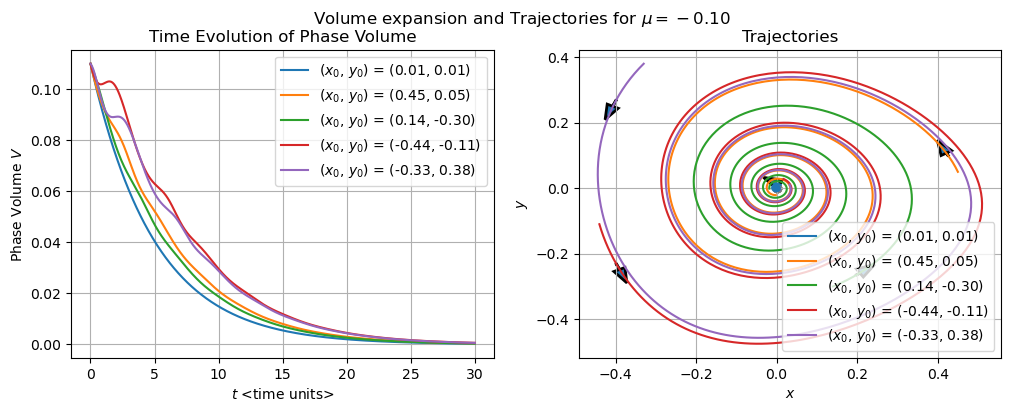

In [4]:
########################################
### Solving the system for mu = -0.1 ###
########################################

# Setting mu 
mu = -0.1


# Setting the time domain of integration
# t_end is generally kept to be small to prevent the blowing up of the solutions
t_end = 30
t = np.linspace(t_start, t_end, 1000)

# Setting up the initial conditions for the system
# The initial volume for simplicity has been assumed to be the absolute value of mu + 0.01

z_initial = [[x_in[i], y_in[i], np.abs(mu) + 0.01] for i in range(lengthDataSet)]

# Finding the solution for "randomly" chosen initial points
solution = [odeint(modelVolTracking, z_initial[i], t, args = (mu, )) for i in range(lengthDataSet)]

# plotting the solution thus obtained
fig1, ax1 = plt.subplots(1, 2, figsize=(12,4.))
for i in range(lengthDataSet):
    ax1[0].plot(t, solution[i][:, 2], label = "($x_0$, $y_0$) = (%.2f, "%z_initial[i][0] + "%.2f)"%z_initial[i][1])
    ax1[0].grid()
    ax1[0].set_xlabel("$t$ <time units>")
    ax1[0].set_ylabel("Phase Volume $V$")
    ax1[0].legend(loc = "best")
    ax1[0].set_title("Time Evolution of Phase Volume")
    
    ax1[1].plot(solution[i][:, 0], solution[i][:, 1], label = "($x_0$, $y_0$) = (%.2f, "%z_initial[i][0] + "%.2f)"%z_initial[i][1])
    ax1[1].scatter(0,0, color="grey")
    ax1[1].set_xlabel("$x$")
    ax1[1].set_ylabel("$y$")
    ax1[1].arrow(solution[i][:, 0][7], solution[i][:, 1][7], solution[i][:, 0][7]-solution[i][:, 0][6], solution[i][:, 1][7] - solution[i][:, 1][6], shape='full', lw=2, length_includes_head=False, head_width=.03)
    ax1[1].legend(loc = "best")
    ax1[1].set_title("Trajectories")
    ax1[1].grid()

fig1.suptitle("Volume expansion and Trajectories for $\mu=%.2f$"%mu)
    
    

Text(0.5, 0.98, 'Volume expansion and Trajectories for $\\mu=0.10$')

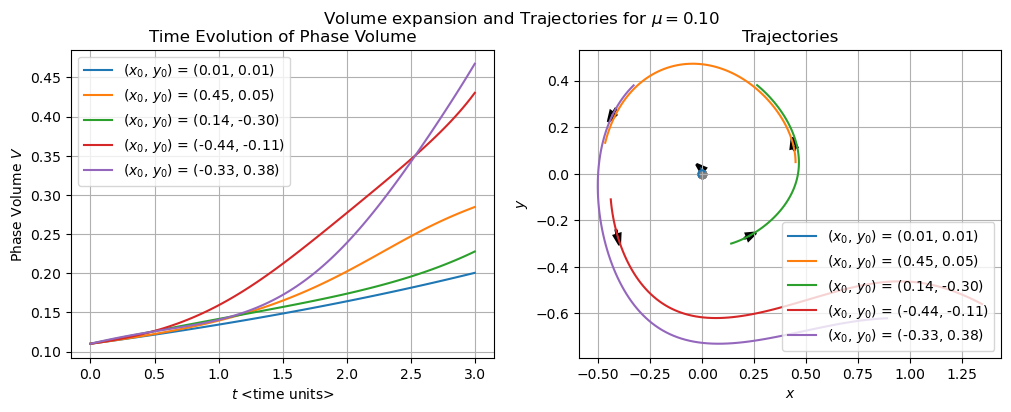

In [5]:
########################################
### Solving the system for mu = +0.1 ###
########################################

# Setting mu 
mu = 0.1

# Setting the time domain of integration
# t_end is generally kept to be small to prevent the blowing up of the solutions

t_end = 3
t = np.linspace(t_start, t_end, 100)

# Iniital conditions
z_initial = [[x_in[i], y_in[i], np.abs(mu) + 0.01] for i in range(lengthDataSet)]

# Defining an empty list to store initial points and finding the solution for "randomly" chosen initial points
solution = [odeint(modelVolTracking, z_initial[i], t, args = (mu, )) for i in range(lengthDataSet)]

# plotting the solution thus obtained
fig2, ax2 = plt.subplots(1, 2, figsize=(12,4.))

for i in range(lengthDataSet):
    ax2[0].plot(t, solution[i][:, 2], label = "($x_0$, $y_0$) = (%.2f, "%z_initial[i][0] + "%.2f)"%z_initial[i][1])
    ax2[0].set_xlabel("$t$ <time units>")
    ax2[0].set_ylabel("Phase Volume $V$")
    ax2[0].legend(loc = "best")
    ax2[0].set_title("Time Evolution of Phase Volume")
    ax2[0].grid()
    
    ax2[1].plot(solution[i][:, 0], solution[i][:, 1], label = "($x_0$, $y_0$) = (%.2f, "%z_initial[i][0] + "%.2f)"%z_initial[i][1])
    ax2[1].grid()
    ax2[1].scatter(0,0, color="grey")
    ax2[1].set_xlabel("$x$")
    ax2[1].set_ylabel("$y$")
    ax2[1].arrow(solution[i][:, 0][7], solution[i][:, 1][7], solution[i][:, 0][7]-solution[i][:, 0][6], solution[i][:, 1][7] - solution[i][:, 1][6], shape='full', lw=2, length_includes_head=False, head_width=.03)
    ax2[1].legend(loc = "lower right")
    ax2[1].set_title("Trajectories")
fig2.suptitle("Volume expansion and Trajectories for $\mu=%.2f$"%mu)


Text(0.5, 0.98, 'Volume expansion and Trajectories for $\\mu=0.00$')

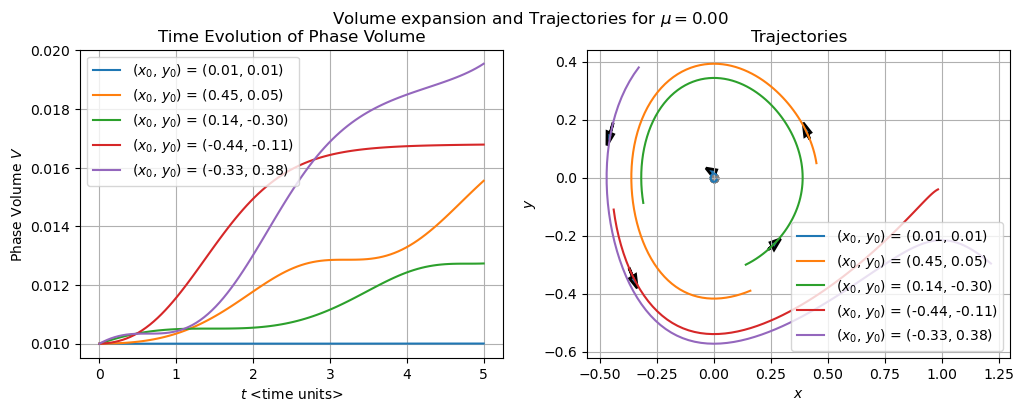

In [6]:
########################################
### Solving the system for mu = 0 ###
########################################

# Setting mu 
mu = 0

# Setting the time domain of integration
# t_end is generally kept to be small to prevent the blowing up of the solutions
t_end = 5
t = np.linspace(t_start, t_end, 100)

# Setting up the initial conditions for the system
# The initial volume for simplicity has been assumed to be the absolute value of mu+0.01
z_initial = [[x_in[i], y_in[i], np.abs(mu) +0.01] for i in range(lengthDataSet)]

# Defining an empty list to store initial points and finding the solution for "randomly" chosen initial points
solution = [odeint(modelVolTracking, z_initial[i], t, args = (mu, )) for i in range(lengthDataSet)]

# plotting the solution thus obtained
fig3, ax3 = plt.subplots(1, 2, figsize=(12,4.))

for i in range(lengthDataSet):
    ax3[0].plot(t, solution[i][:, 2], label = "($x_0$, $y_0$) = (%.2f, "%z_initial[i][0] + "%.2f)"%z_initial[i][1])
    ax3[0].set_xlabel("$t$ <time units>")
    ax3[0].set_ylabel("Phase Volume $V$")
    ax3[0].legend(loc = "best")
    ax3[0].set_title("Time Evolution of Phase Volume")
    ax3[0].grid()
    
    ax3[1].plot(solution[i][:, 0], solution[i][:, 1], label = "($x_0$, $y_0$) = (%.2f, "%z_initial[i][0] + "%.2f)"%z_initial[i][1])
    ax3[1].scatter(0,0, color="grey")
    ax3[1].set_xlabel("$x$")
    ax3[1].set_ylabel("$y$")
    ax3[1].arrow(solution[i][:, 0][7], solution[i][:, 1][7], solution[i][:, 0][7]-solution[i][:, 0][6], solution[i][:, 1][7] - solution[i][:, 1][6], shape='full', lw=2, length_includes_head=False, head_width=.03)
    ax3[1].legend(loc = "lower right")
    ax3[1].set_title("Trajectories")
    ax3[1].grid()

    
fig3.suptitle("Volume expansion and Trajectories for $\mu=%.2f$"%mu)
